In [71]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
df = pd.read_csv("airbnb.csv")

In [46]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,4826,The Place,6603,Kaan,NaN,Uskudar,41.05650,29.05367,Entire home/apt,720,1,1,2009-06-01,0.01,1,365
1,20815,The Bosphorus from The Comfy Hill,78838,Gülder,NaN,Besiktas,41.06984,29.04545,Entire home/apt,816,365,41,2018-11-07,0.33,2,279
2,27271,LOVELY APT. IN PERFECT LOCATION,117026,Mutlu,NaN,Beyoglu,41.03254,28.98153,Entire home/apt,233,30,13,2018-05-04,0.19,1,289
3,28277,Duplex Apartment with Terrace,121607,Alen,NaN,Sisli,41.04471,28.98567,Hotel room,761,3,0,NaN,NaN,19,365
4,28318,Cosy home overlooking Bosphorus,121721,Aydin,NaN,Sariyer,41.09048,29.05559,Entire home/apt,823,3,0,NaN,NaN,1,88


In [47]:
df = df.drop(columns=["id", "name", "host_id", "host_name", "neighbourhood_group", "last_review","reviews_per_month"])

In [48]:
df.head()

,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,Uskudar,41.05650,29.05367,Entire home/apt,720,1,1,1,365
1,Besiktas,41.06984,29.04545,Entire home/apt,816,365,41,2,279
2,Beyoglu,41.03254,28.98153,Entire home/apt,233,30,13,1,289
3,Sisli,41.04471,28.98567,Hotel room,761,3,0,19,365
4,Sariyer,41.09048,29.05559,Entire home/apt,823,3,0,1,88


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23728 entries, 0 to 23727
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood                   23728 non-null  object 
 1   latitude                        23728 non-null  float64
 2   longitude                       23728 non-null  float64
 3   room_type                       23728 non-null  object 
 4   price                           23728 non-null  int64  
 5   minimum_nights                  23728 non-null  int64  
 6   number_of_reviews               23728 non-null  int64  
 7   calculated_host_listings_count  23728 non-null  int64  
 8   availability_365                23728 non-null  int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 1.6+ MB


In [50]:
df["room_type"].unique()

array(['Entire home/apt', 'Hotel room', 'Private room', 'Shared room'],
      dtype=object)

In [51]:
df["neighbourhood"].unique()

array(['Uskudar', 'Besiktas', 'Beyoglu', 'Sisli', 'Sariyer', 'Fatih',
       'Kadikoy', 'Kagithane', 'Adalar', 'Maltepe', 'Esenyurt', 'Beykoz',
       'Basaksehir', 'Bahcelievler', 'Bagcilar', 'Silivri', 'Beylikduzu',
       'Umraniye', 'Sile', 'Cekmekoy', 'Kucukcekmece', 'Sancaktepe',
       'Bakirkoy', 'Tuzla', 'Pendik', 'Atasehir', 'Kartal', 'Sultangazi',
       'Gaziosmanpasa', 'Buyukcekmece', 'Eyup', 'Zeytinburnu', 'Catalca',
       'Avcilar', 'Gungoren', 'Esenler', 'Sultanbeyli', 'Bayrampasa',
       'Arnavutkoy'], dtype=object)

In [52]:
le=LabelEncoder()
le.fit(df["room_type"])
df["room_type"]=le.transform(df["room_type"])

In [53]:
le_neighbourhood=LabelEncoder()
le_neighbourhood.fit(df["neighbourhood"])
df["neighbourhood"]=le_neighbourhood.transform(df["neighbourhood"])

In [54]:
df.head(10)

,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,37,41.05650,29.05367,0,720,1,1,1,365
1,9,41.06984,29.04545,0,816,365,41,2,279
2,12,41.03254,28.98153,0,233,30,13,1,289
3,32,41.04471,28.98567,1,761,3,0,19,365
4,29,41.09048,29.05559,0,823,3,0,1,88
5,12,41.04844,28.95254,2,343,3,0,1,364
6,12,41.03350,28.97626,2,768,1,1,1,365
7,32,41.05382,28.99739,2,384,2,1,2,364
8,12,41.02704,28.97588,2,473,1,0,1,365
9,12,41.03658,28.97213,0,459,30,38,3,364


In [55]:
y= df["price"]
x=df.drop(columns=["price"])

In [56]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,train_size=0.70)

In [57]:
ss=StandardScaler()
x_train =ss.fit_transform(x_train)
x_test=ss.transform(x_test)

In [58]:
from sklearn.neighbors import KNeighborsRegressor


knn = KNeighborsRegressor(5, metric="euclidean")
model=knn.fit(x_train, y_train)
model.score(x_test,y_test)


0.3149852610092291

In [59]:
print("KNeighborsRegressor Training Accuracy:", model.score(x_train , y_train))
print("KNeighborsRegressor Testing Accuracy:", model.score(x_test , y_test))

KNeighborsRegressor Training Accuracy: 0.405602443810703
KNeighborsRegressor Testing Accuracy: 0.3149852610092291


In [60]:
y_pred = model.predict(x_test)
mean_squared_error(y_test,y_pred)

2612849.732900688

In [61]:
mean_absolute_percentage_error(y_test,y_pred)

1.098924806532883

C:\Users\MERAL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


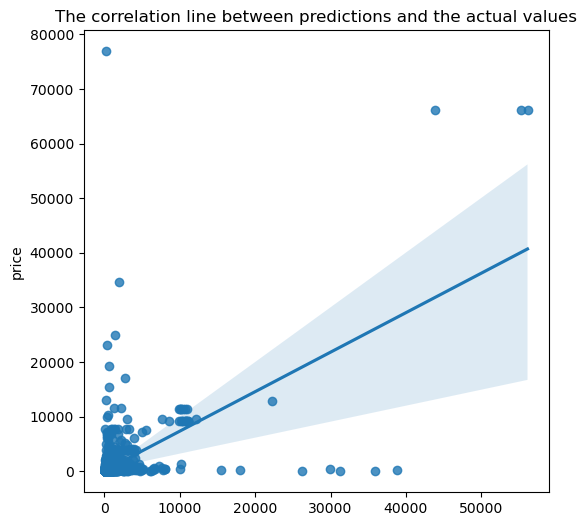

In [74]:
plt.figure(figsize=(6,6))
sns.regplot(y_pred, y_test)
plt.title("The correlation line between predictions and the actual values")
plt.show()

In [62]:
rf=RandomForestRegressor(n_estimators=300)
model=rf.fit(x_train,y_train)
model.score(x_test,y_test)

0.2988650550033407

In [73]:
print("Random Forest Training Accuracy:", model.score(x_train , y_train))
print("Random Forest Testing Accuracy:", model.score(x_test , y_test))

Random Forest Training Accuracy: 0.8903451756481536
Random Forest Testing Accuracy: 0.2988650550033407


In [64]:
y_pred = model.predict(x_test)
df2 = pd.DataFrame({"Y_test": y_test , "Y_pred" : y_pred})
df2.head(20)

,Y_test,Y_pred
8819,1076,955.295333
19665,247,218.030000
16568,199,231.806667
16693,1385,495.316667
17464,302,496.396667
20751,494,592.820000
12570,425,600.950000
7217,226,180.836667
10180,3846,2343.546667
6717,110,125.950000


In [67]:
mean_squared_error(y_test,y_pred)

2674336.987932374

In [68]:
mean_absolute_percentage_error(y_test,y_pred)

1.2647693392661699